In [1]:
import json
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.decomposition import TruncatedSVD

from tqdm.auto import tqdm
from pathlib import Path


def reduction_dim(dict_lex, n_components=4):
    dict_lex_reduced = {}
    for k, v in dict_lex.items():
        svd = TruncatedSVD(n_components=n_components)
        svd.fit(np.array([e[1] for e in v]))
        dict_lex_reduced[k] = [(e[0], svd.transform([e[1]])[0]) for e in v]
    return dict_lex_reduced


def plot_clusters(liste_lex, cluster, N_CLUSTERS:int = None, type: str = "lex", print:bool = False, save:bool = True) -> None:
    plt.figure(figsize=(20, 20))

    if isinstance(cluster, AffinityPropagation):
        plt.title(f"AffinityPropagation")
        for i in range(N_CLUSTERS):
            plt.scatter(
                [e[1][0] for e in liste_lex],
                [e[1][1] for e in liste_lex],
                c=cluster.labels_.astype(float),
                # cmap="viridis",
                label=i,
            )

        plt.scatter(
            [e[0] for e in cluster.cluster_centers_],
            [e[1] for e in cluster.cluster_centers_],
            c="black",
            s=200,
            alpha=0.5,
            label="Centers",
        )

    elif isinstance(cluster, KMeans):
        plt.title(f"KMeans")

        for i in range(N_CLUSTERS):
            plt.scatter(
                [e[1][0] for e in liste_lex],
                [e[1][1] for e in liste_lex],
                c=cluster.labels_.astype(float),
                # cmap="viridis",
                label=i,
            )
        plt.scatter(
            [e[0] for e in cluster.cluster_centers_],
            [e[1] for e in cluster.cluster_centers_],
            c="black",
            s=200,
            alpha=0.5,
            label="Centers",
        )
        #
        # plt.scatter(
        #     [e[1][0] for e in liste_lex],
        #     [e[1][1] for e in liste_lex],
        #     c=cluster.labels_,
        #     cmap="viridis",
        #     label=cluster.labels_,
        # )
        # plt.scatter(
        #     [e[0] for e in cluster.cluster_centers_],
        #     [e[1] for e in cluster.cluster_centers_],
        #     c="black",
        #     s=200,
        #     alpha=0.5,
        #     # label="Centers",
        # )

    elif isinstance(cluster, AgglomerativeClustering):
        plt.title(f"AgglomerativeClustering")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
            label=cluster.labels_,
        )


    elif isinstance(cluster, SpectralClustering):
        plt.title(f"SpectralClustering")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
            label=cluster.labels_,
        )

    elif isinstance(cluster, DBSCAN):
        plt.title(f"DBSCAN")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
            label=cluster.labels_,
        )
        plt.scatter(
            [e[0] for e in cluster.cluster_centers_],
            [e[1] for e in cluster.cluster_centers_],
            c="black",
            s=200,
            alpha=0.5,
            # label="Centers",
        )



    else:
        raise ValueError("Cluster inconnu")


    if N_CLUSTERS is not None:
        title = f"{cluster.__class__.__name__}_{N_CLUSTERS}_clusters_{type}"
    else:
        title = f"{cluster.__class__.__name__}_{type}"

    plt.legend()
    if save: plt.savefig(f"imgs/clusters/{title}.png")
    if print: plt.show()
    plt.close()


def save_clusters(liste_lex, cluster, N_CLUSTERS:int = None, type: str = "lex") -> None:
    Path("clusters").mkdir(parents=True, exist_ok=True)
    if N_CLUSTERS is not None:
        title = f"{cluster.__class__.__name__}_{N_CLUSTERS}_clusters_{type}"
    else:
        title = f"{cluster.__class__.__name__}_{type}"
    with open(f"clusters/{title}.pickle", mode="wb") as f:
        pickle.dump(cluster, f)
    with open(f"clusters/{title}_liste_lex.pickle", mode="wb") as f:
        pickle.dump(liste_lex, f)
    print(f"Clusters {title} sauvegardés")

def clusters_to_json(liste_lex, cluster, N_CLUSTERS:int = None, type: str = "lex") -> None:
    Path("clusters").mkdir(parents=True, exist_ok=True)
    if N_CLUSTERS is not None:
        title = f"{cluster.__class__.__name__}_{N_CLUSTERS}_clusters_{type}"
    else:
        title = f"{cluster.__class__.__name__}_{type}"

    with open(f"clusters/{title}.json", mode="w") as f:
        json.dump({"clusters": cluster.labels_.tolist(), "liste_lex": [e[0] for e in liste_lex]}, f)


with open("collection_textes.pickle", mode="rb") as f:
    collection_textes = pickle.load(f)

N_COMPONENTS = 2
N_CLUSTERS = 10


In [18]:
collection_textes[0].json_path

PosixPath('Corpus/Mazarinades_json/1-100/Moreau100_GALL.json')

In [2]:
allecarts = [e.ecarts for e in collection_textes]
alllex = [e.lexicalites for e in collection_textes]
# newvect = [np.nan_to_num(np.array((e.ecart, e.lexicalite))) for e in collection_textes if e.plain]

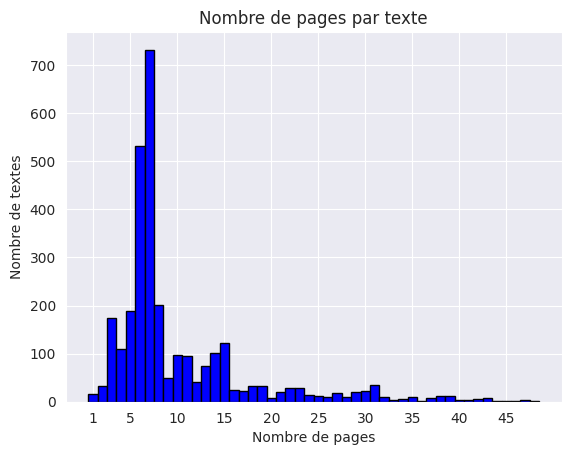

In [3]:
stat = [len(e) for e in allecarts if len(e) < 50]
stat1 = [len(e) for e in alllex if len(e) < 50]
# plt.hist(stat, bins=50, range=(0, 50), color="blue", edgecolor="black")
plt.hist(stat1, bins=np.arange(1, 50) - 0.5, range=(0, 50), color="blue", edgecolor="black")
plt.xticks([1] + list(range(0, 50, 5)[1:]))
plt.figsize = (20, 20)
plt.xlabel("Nombre de pages")
plt.ylabel("Nombre de textes")
plt.title("Nombre de pages par texte")
plt.savefig("imgs/histo_nb_pages.png")
plt.show()


In [4]:
dict_lex = {taile: [] for taile in range(1000)}
for i, lex in enumerate(alllex):
    dict_lex[len(lex)].append((i, lex))

dict_lex = {k: v for k, v in dict_lex.items() if v}

# _ = [print(k, len(v)) for k, v in dict_lex.items()]


In [5]:
dict_ecarts = {taile: [] for taile in range(1000)}
for i, ecart in enumerate(allecarts):
    dict_ecarts[len(ecart)].append((i, ecart))

dict_ecarts = {k: v for k, v in dict_ecarts.items() if v}

# _ = [print(k, len(v)) for k, v in dict_ecarts.items()]

In [6]:
# dict_lex_sub_40 = {k: v for k, v in dict_lex.items() if k < 40}
# dict_lex_sup_2 = {k: v for k, v in dict_lex.items() if k > 2}
dict_lex_sup_n_sub = {k: v for k, v in dict_lex.items() if N_COMPONENTS < k < 80}
dict_ecarts_sup_n_sub = {k: v for k, v in dict_ecarts.items() if N_COMPONENTS < k < 80}


In [7]:
dict_lex_reduced = reduction_dim(dict_lex_sup_n_sub, n_components=N_COMPONENTS)
dict_ecarts_reduced = reduction_dim(dict_ecarts_sup_n_sub, n_components=N_COMPONENTS)


/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_tru

In [8]:
liste_lex = [e for v in dict_lex_reduced.values() for e in v if len(e[1]) == 2]
liste_ecarts = [e for v in dict_ecarts_reduced.values() for e in v if len(e[1]) == 2]
combined = [(*e, *f) for e, f in zip(liste_lex, liste_ecarts)]
# liste_new = [(i, e) for i, e in enumerate(newvect)]

In [9]:
# aff = AffinityPropagation(damping = 0.9, max_iter = 1000).fit(np.array([e[1] for e in liste_lex]))
# aff2 = AffinityPropagation(damping = 0.9, max_iter = 1000).fit(np.array([e[1] for e in liste_ecarts]))
#
# plot_clusters(liste_lex, aff)
# plot_clusters(liste_ecarts, aff2, type="ecarts")


# for N_CLUSTERS in tqdm(range(2, 20)):
#
#     kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_lex]))
#     kmeans2 = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_ecarts]))
#     kmeans3 = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in combined]))
#     # kmeans3 = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_new]))
#
#     plot_clusters(liste_lex, kmeans, N_CLUSTERS)
#     plot_clusters(liste_ecarts, kmeans2, N_CLUSTERS, type="ecarts")
#     plot_clusters(combined, kmeans3, N_CLUSTERS, type="combined")
#     # plot_clusters(liste_new, kmeans3, N_CLUSTERS, type="new")
    #
    # save_clusters(liste_lex, kmeans, N_CLUSTERS)
    # save_clusters(liste_ecarts, kmeans2, N_CLUSTERS, type="ecarts")
    #
    # clusters_to_json(liste_lex, kmeans, N_CLUSTERS)
    # clusters_to_json(liste_ecarts, kmeans2, N_CLUSTERS, type="ecarts")
    #
    # agg = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_lex]))
    # agg2 = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_ecarts]))
    #
    # plot_clusters(liste_lex, agg, N_CLUSTERS)
    # plot_clusters(liste_ecarts, agg2, N_CLUSTERS, type="ecarts")
    #
    # spec = SpectralClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_lex]))
    # spec2 = SpectralClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_ecarts]))
    #
    # plot_clusters(liste_lex, spec, N_CLUSTERS)
    # plot_clusters(liste_ecarts, spec2, N_CLUSTERS, type="ecarts")


In [10]:
type(liste_lex[0][1])


numpy.ndarray

In [11]:
with open("clusters/KMeans_10_clusters_lex.pickle", mode="rb") as f:
    clusters = pickle.load(f)

with open("clusters/KMeans_10_clusters_ecarts.pickle", mode="rb") as f:
    clustersecarts = pickle.load(f)

clusters.labels_


array([5, 5, 5, ..., 3, 3, 3], dtype=int32)

In [12]:
for i, cluster in enumerate(clusters.labels_):
    if cluster == 10:
        print(liste_lex[i][0])


In [13]:
liste_lex[0]


(80, array([ 0.94702107, -0.13644037]))

In [14]:
liste_lex[0][1].tolist()


[0.9470210745839198, -0.1364403695143207]

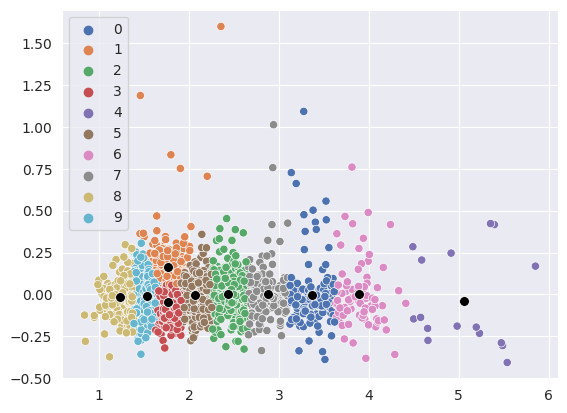

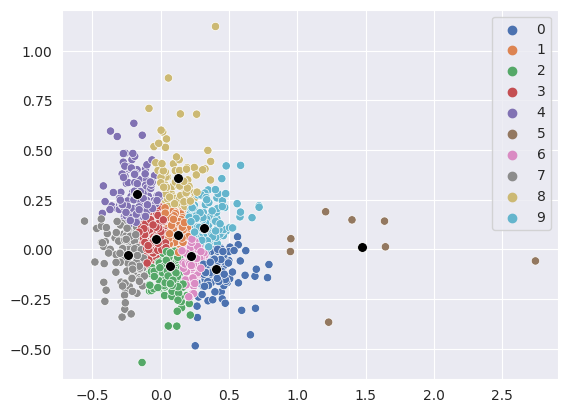

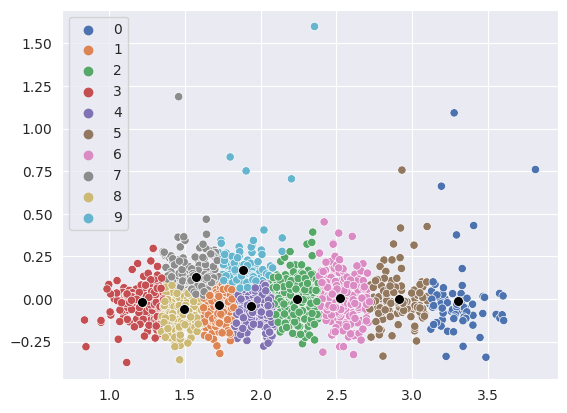

In [15]:
import seaborn as sns
N_CLUSTERS = 10

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_lex]))
kmeans2 = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_ecarts]))
kmeans3 = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in combined]))

sns.scatterplot(x=[e[1][0] for e in liste_lex], y=[e[1][1] for e in liste_lex], hue=kmeans.labels_, palette="deep", legend="full")
sns.scatterplot(x=[e[0] for e in kmeans.cluster_centers_], y=[e[1] for e in kmeans.cluster_centers_], color="k", s=50)
plt.savefig("imgs/2d_lex.png")
plt.show()

sns.scatterplot(x=[e[1][0] for e in liste_ecarts], y=[e[1][1] for e in liste_ecarts], hue=kmeans2.labels_, palette="deep", legend="full")
sns.scatterplot(x=[e[0] for e in kmeans2.cluster_centers_], y=[e[1] for e in kmeans2.cluster_centers_], color="k", s=50)
plt.savefig("imgs/2d_ecarts.png")
plt.show()


sns.scatterplot(x=[e[1][0] for e in combined], y=[e[1][1] for e in combined], hue=kmeans3.labels_, palette="deep", legend="full")
sns.scatterplot(x=[e[0] for e in kmeans3.cluster_centers_], y=[e[1] for e in kmeans3.cluster_centers_], color="k", s=50)
plt.savefig("imgs/2d_combined.png")
plt.show()





In [16]:
from io import StringIO

def truc(km, type_="lex"):
    with StringIO() as f:

        seen_clusters = set()
        for i, cluster in enumerate(km.labels_):
            if cluster not in seen_clusters:
                seen_clusters.add(cluster)
            else:
                continue

            txt = collection_textes[i]
            print(f"{i = }\n{cluster = }\n{txt.path = }\n{txt.json_path = }\n{txt.lexicalite = }\n{txt.n_pages = }\n{txt.ecart = }\n{txt.ecarts = }\nTexte = ", *txt.texte, file=f, end="\n\n\n", sep="\n")
            print(cluster, txt.lexicalite, txt.ecart)

        with open(f"test_{N_CLUSTERS}_clusters_{type_}.txt", mode="w") as f2:
            f2.write(f.getvalue())

def truc_seq(km, type_="lex"):
    with StringIO() as f:

        not_seen = np.unique(km.labels_)
        while not_seen.size:

            for i, cluster in enumerate(km.labels_):
                if cluster == not_seen[0]:
                    not_seen = np.delete(not_seen, 0)
                else:
                    if type(cluster) != type(not_seen[0]):
                        print(type(cluster))
                        print(type(not_seen[0]))
                        raise

                    continue

                txt = collection_textes[i]
                print(f"{i = }\n{cluster = }\n{txt.path = }\n{txt.json_path = }\n{txt.lexicalite = }\n{txt.n_pages = }\n{txt.ecart = }\n{txt.ecarts = }\nTexte = ", *txt.texte, file=f, end="\n\n\n", sep="\n")
                print(cluster, txt.lexicalite, txt.ecart)

                if not_seen.size == 0:
                    print("break")
                    break

        with open(f"test_sequentiel_{N_CLUSTERS}_clusters_{type_}.txt", mode="w") as f2:
            f2.write(f.getvalue())


import shutil


def truc_seq_json(km, type_="lex"):
    folder = Path(f"res/{type_}/")
    folder.mkdir(exist_ok=True, parents=True)

    not_seen = np.unique(km.labels_)

    while not_seen.size:
        for i, cluster in enumerate(km.labels_):
            if cluster == not_seen[0]:
                not_seen = np.delete(not_seen, 0)
            else:
                if type(cluster) != type(not_seen[0]):
                    print(type(cluster))
                    print(type(not_seen[0]))
                    raise

                continue

            txt = collection_textes[i]

            file = txt.json_path
            if isinstance(file, str):
                print("str")
                file = Path(file)

            new_file = folder / f"{cluster}_{file.name}"
            shutil.copy(file, new_file)

def wrap_truc(km, type_="lex"):
    truc(km, type_)
    truc_seq(km, type_)
    truc_seq_json(km, type_)

In [17]:
wrap_truc(kmeans)

wrap_truc(kmeans2, type_="ecarts")

wrap_truc(kmeans3, type_="combo")


8 0.6802325581395349 0.08828731400939836
9 0.6522935779816513 0.0641364297426001
1 0.6945898778359512 0.030645917704832475
3 0.6100823045267489 0.08310872415841991
5 0.6592039800995025 0.1262220136754453
2 0.5705128205128205 0.1046941170541063
7 0.6671309192200557 0.10624261670585873
0 0.6044499381953028 0.10966297921968814
6 0.6619115549215406 0.10490462119129809
4 0.599195710455764 0.13743046395595573
0 0.6044499381953028 0.10966297921968814
1 0.6385714285714286 0.033841025488622695
2 0.35974842767295595 0.06658392545815038
3 0.6100823045267489 0.08310872415841991
4 0.599195710455764 0.13743046395595573
5 0.6592039800995025 0.1262220136754453
6 0.6619115549215406 0.10490462119129809
7 0.6577669902912622 0.1014284397803144
8 0.6802325581395349 0.08828731400939836
9 0.6522935779816513 0.0641364297426001
break


FileNotFoundError: [Errno 2] No such file or directory: 'Corpus/Mazarinades_json/601-700/Moreau684_GBOOKS.json'

In [ ]:
"Corpus/Mazarinades_jsons/" == "Corpus/Mazarinades_json/"


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

